# import package yang diperlukan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

## Import Data Frame

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
#tampilkan informasi data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#dari info di atas diketahui bahwa data frame tidak memiliki data null
#Tampilkan data teratas dari data frame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
#tentukan kolom feature dan kolom target
x = df.drop('target', 1)
y = df.target

#split data menjadi data train dan data test dengan rasio 30% untuk data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Analisa Data Menggunakan Metode-Metode berikut

### a. Linear Regression

In [9]:
#buat model regresi
model_reg = LinearRegression().fit(x_train, y_train)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(model_reg.score(x_test, y_test))

Accuracy score : 
0.500022603537717


### b. Polynomial Regression

In [10]:
#transformasi data menjadi model polinomial berderajat 2
x_train_transform = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(x_train)
x_test_transform = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(x_test)

#buat model regresi
model_regpoli = LinearRegression().fit(x_train_transform, y_train)


#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(model_regpoli.score(x_test_transform, y_test))

Accuracy score : 
0.6498023952814466


In [11]:
#transformasi data menjadi model polinomial berderajat 3
x_train_transform = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_train)
x_test_transform = PolynomialFeatures(degree = 3, include_bias = False).fit_transform(x_test)

#buat model regresi
model_regpoli = LinearRegression().fit(x_train_transform, y_train)


#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(model_regpoli.score(x_test_transform, y_test))

Accuracy score : 
0.1695337700714138


In [12]:
#transformasi data menjadi model polinomial berderajat 4
x_train_transform = PolynomialFeatures(degree = 4, include_bias = False).fit_transform(x_train)
x_test_transform = PolynomialFeatures(degree = 4, include_bias = False).fit_transform(x_test)

#buat model regresi
model_regpoli = LinearRegression().fit(x_train_transform, y_train)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(model_regpoli.score(x_test_transform, y_test))

Accuracy score : 
0.6794317140657777


### c. Logistic Regression

In [13]:
#buat model regresi
model_log = LogisticRegression().fit(x_train, y_train)

#prediksi model pada data test
pred_test = model_log.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score : 
0.8441558441558441 

Confusion Matrix :
[[108  36]
 [ 12 152]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


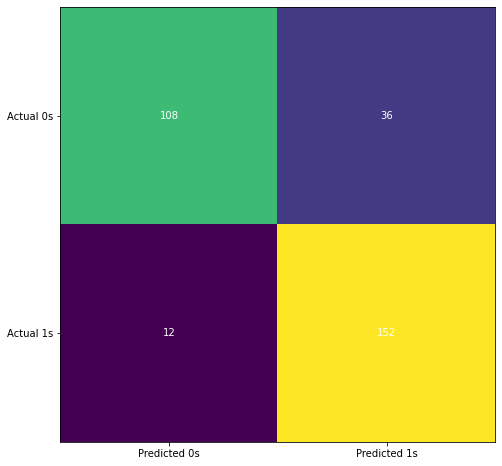

In [19]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()

### d. Decision Tree Alghorithm

In [20]:
#buat model
model_dt = tree.DecisionTreeClassifier().fit(x_train, y_train)

#prediksi model pada data test
pred_test = model_dt.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score : 
1.0 

Confusion Matrix :
[[144   0]
 [  0 164]]


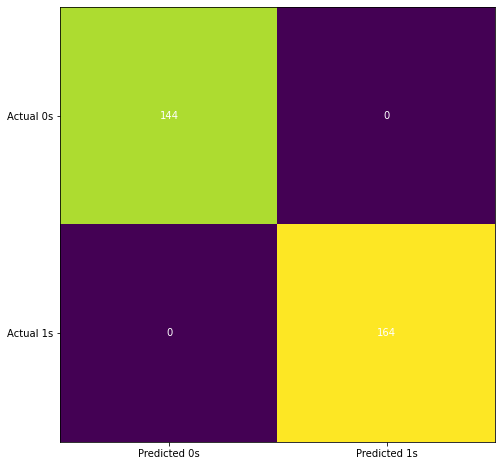

In [21]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()

### e. Random Forest Algorithm

In [22]:
#buat model
model_rf = RandomForestClassifier().fit(x_train, y_train)

#prediksi model pada data test
pred_test = model_rf.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score : 
1.0 

Confusion Matrix :
[[144   0]
 [  0 164]]


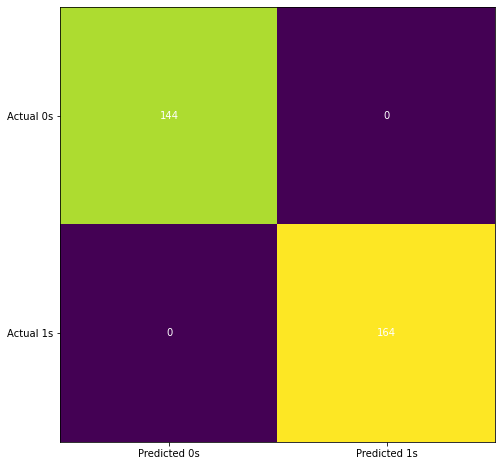

In [23]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()

### f. Support Vector Machine

In [24]:
#buat model
model_svm = svm.SVC().fit(x_train, y_train)

#prediksi model pada data test
pred_test = model_svm.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score: ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score: 
0.672077922077922 

Confusion Matrix :
[[ 94  50]
 [ 51 113]]


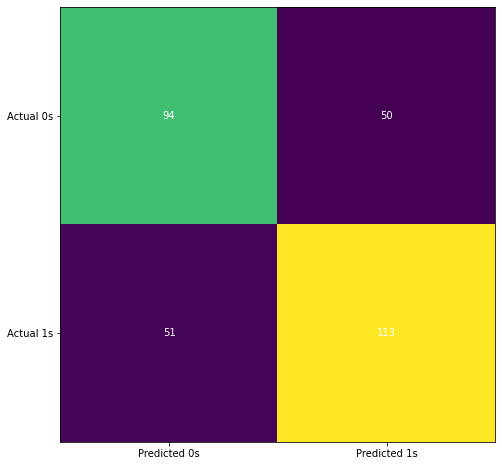

In [25]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()

### g. Naive Bayes Algorithm

In [26]:
#buat model
nb = GaussianNB().fit(x_train, y_train)

#prediksi model pada data test
pred_test = nb.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score : 
0.8376623376623377 

Confusion Matrix :
[[117  27]
 [ 23 141]]


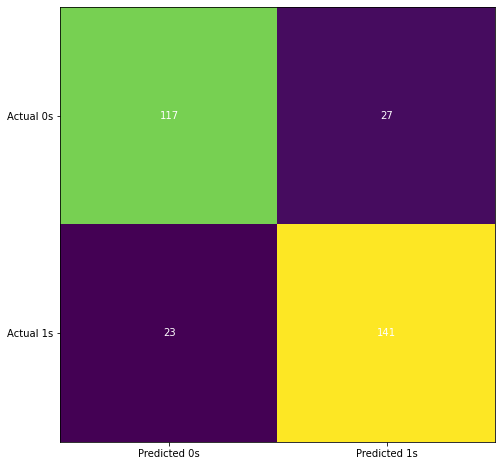

In [27]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()

### h. K-Nearest Neightbor (KNN) Algorithm

In [28]:
#buat model
knn = KNeighborsClassifier().fit(x_train, y_train)

#prediksi model pada data test
pred_test = knn.predict(x_test)

#Tentukan skor akurasi dari model
print('Accuracy score : ')
print(accuracy_score(y_test, pred_test),'\n')

#Tentukan Confusion Matrixnya
matrix = confusion_matrix(y_test, pred_test)
print('Confusion Matrix :')
print(matrix)

Accuracy score : 
0.7305194805194806 

Confusion Matrix :
[[112  32]
 [ 51 113]]


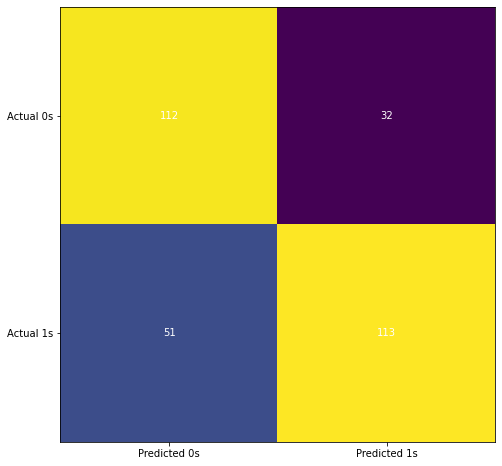

In [29]:
#visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='white')
plt.show()